In [4]:
%matplotlib inline

In [5]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation


In [6]:
# Load the data in test csv, create test set 
testcsv = pd.read_csv("C:\\Users\\rs\\Desktop\\prudential\\test\\test.csv")
# Take a look
testcsv.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Load the data in
traincsv = pd.read_csv("C:\\Users\\rs\\Desktop\\prudential\\trainset\\train.csv")
# Take a look
traincsv.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


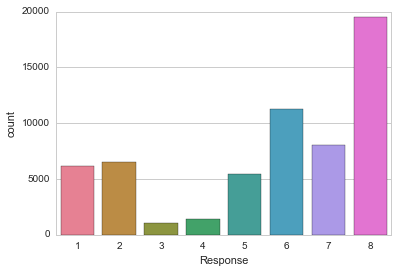

In [8]:
# find the number of users who answered the response rating from 1-8, that excludes the ones with the nan response
sns.countplot(x='Response',data=traincsv,palette="husl", order = range(1,9))

In [9]:
testcsv.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_19       int64
Medical_

In [10]:
traincsv.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

In [11]:
traincsv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.4+ MB


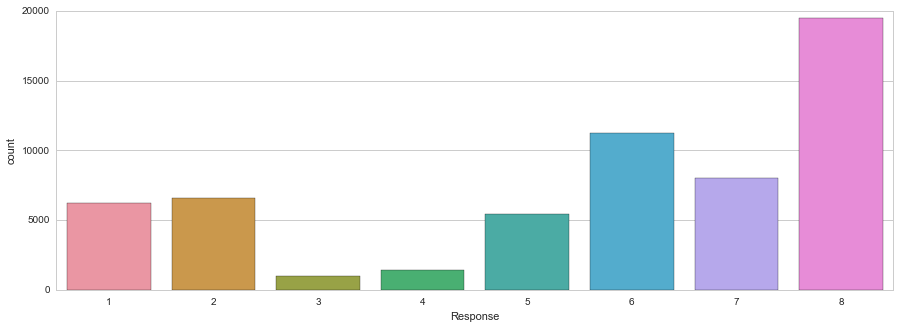

In [13]:
# answer response variable on test set

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x=traincsv["Response"], order=[1,2,3,4,5,6,7,8], ax=axis1)

In [14]:
## We want to list features with missing values from the train set. These columns show there are numerous amount of columns with null values  

print("%20s \tCount \tPct missing" % 'Feature')
for column_name, column in traincsv.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/traincsv.shape[0]
       print("%20s \t%5d  \t%2.2f%%" % (column_name, naCount, 100.*naCount/traincsv.shape[0]))

             Feature 	Count 	Pct missing
   Employment_Info_1 	   19  	0.03%
   Employment_Info_4 	 6779  	11.42%
   Employment_Info_6 	10854  	18.28%
 Insurance_History_5 	25396  	42.77%
       Family_Hist_2 	28656  	48.26%
       Family_Hist_3 	34241  	57.66%
       Family_Hist_4 	19184  	32.31%
       Family_Hist_5 	41811  	70.41%
   Medical_History_1 	 8889  	14.97%
  Medical_History_10 	58824  	99.06%
  Medical_History_15 	44596  	75.10%
  Medical_History_24 	55580  	93.60%
  Medical_History_32 	58274  	98.14%


In [15]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.
# import preprocessing from sklearn to get unique numerical values for NaN values on column

from sklearn import preprocessing

for f in traincsv.columns:
    if traincsv[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(traincsv[f].values) + list(testcsv[f].values)))
        traincsv[f] = lbl.transform(list(traincsv[f].values))
        testcsv[f]       = lbl.transform(list(testcsv[f].values))

In [16]:
# fill NaN values replace the nan with 0 for those in the response column getting nan corresponding to the train set

for f in traincsv.columns:
    if f == "Response": continue
    if traincsv[f].dtype == 'float64':
        traincsv[f].fillna(traincsv[f].mean(), inplace=True)
        testcsv[f].fillna(testcsv[f].mean(), inplace=True)
    else:
        traincsv[f].fillna(traincsv[f].median(), inplace=True)
        testcsv[f].fillna(testcsv[f].median(), inplace=True)

# prudential_df.fillna(0, inplace=True)
# test_df.fillna(0, inplace=True)

In [17]:
# create a X and Y train set for the response data indicated

X_train = traincsv.drop(["Response", "Id"],axis=1)
Y_train = traincsv["Response"]
X_test  = testcsv.drop("Id",axis=1).copy()

In [18]:
# reading the response column for 0-7 instead of 1-8 want to set another prediction
Y_train = Y_train - 1

In [28]:
# response figures for Y_train for values from 0-7 so that means 1 maps to 0 and 8 mapes to 7
Y_train

0        7
1        3
2        7
3        7
4        7
5        7
6        7
7        0
8        7
9        0
10       5
11       1
12       6
13       2
14       7
15       4
16       7
17       6
18       1
19       7
20       7
21       4
22       4
23       7
24       5
25       7
26       5
27       7
28       6
29       5
        ..
59351    4
59352    5
59353    5
59354    5
59355    5
59356    5
59357    5
59358    5
59359    5
59360    4
59361    1
59362    6
59363    5
59364    0
59365    4
59366    7
59367    5
59368    7
59369    1
59370    3
59371    5
59372    1
59373    7
59374    6
59375    7
59376    3
59377    6
59378    7
59379    7
59380    6
Name: Response, dtype: int64

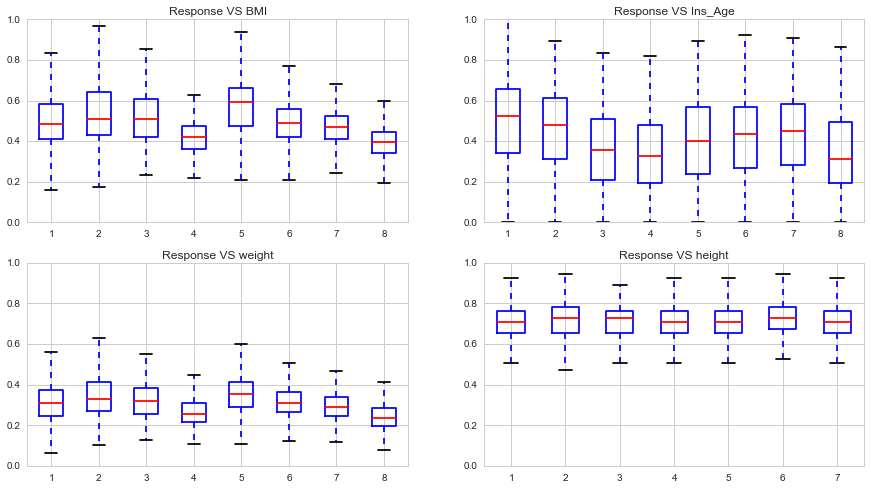

In [19]:
# Influence of BMI on risk level off the train set, give out histogram results
data = []
for i in range(1,9): 
    data.append(traincsv.BMI[traincsv.Response == i])
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
plt.boxplot(data)
plt.title('Response VS BMI')

data = []
for i in range(1,9): 
    data.append(traincsv.Ins_Age[traincsv.Response == i])
plt.subplot(2,2,2)
plt.boxplot(data)
plt.title('Response VS Ins_Age')

data = []
for i in range(1,9): 
    data.append(traincsv.Wt[traincsv.Response == i])
plt.subplot(2,2,3)
plt.boxplot(data)
plt.title('Response VS weight')

data = []
for i in range(1,8): 
    data.append(traincsv.Ht[traincsv.Response == i])
plt.subplot(2,2,4)
plt.boxplot(data)
plt.title('Response VS height')

In [ ]:
# create a X and Y train set for the response data indicated

X_train = traincsv.drop(["Response", "Id"],axis=1)
Y_train = traincsv["Response"]
X_test  = testcsv.drop("Id",axis=1).copy()

In [ ]:


#ExtraTreesClassifier. Using the Extra Trees Classifier as and exable of cleaning more data out using n_estimators
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train,Y_train)
Y_test = etc.predict(X_test)
etc.score(X_train,Y_train)


In [32]:
# Random Forests. have to modify code up there. Already have train and test sets above

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred2 = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

1.0

In [39]:
clf = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth = 9, verbose = 1, n_jobs = -1)

In [44]:
# using the kappa function from a scifit learn function for quadratic weighted kappa which if used for scoring 
def kappa(y_true, y_pred, weights=None, allow_off_by_one=False):
    """
    Calculates the kappa inter-rater agreement between two the gold standard
    and the predicted ratings. Potential values range from -1 (representing
    complete disagreement) to 1 (representing complete agreement).  A kappa
    value of 0 is expected if all agreement is due to chance.
    In the course of calculating kappa, all items in `y_true` and `y_pred` will
    first be converted to floats and then rounded to integers.
    It is assumed that y_true and y_pred contain the complete range of possible
    ratings.
    This function contains a combination of code from yorchopolis's kappa-stats
    and Ben Hamner's Metrics projects on Github.
    :param y_true: The true/actual/gold labels for the data.
    :type y_true: array-like of float
    :param y_pred: The predicted/observed labels for the data.
    :type y_pred: array-like of float
    :param weights: Specifies the weight matrix for the calculation.
                    Options are:
                        -  None = unweighted-kappa
                        -  'quadratic' = quadratic-weighted kappa
                        -  'linear' = linear-weighted kappa
                        -  two-dimensional numpy array = a custom matrix of
                           weights. Each weight corresponds to the
                           :math:`w_{ij}` values in the wikipedia description
                           of how to calculate weighted Cohen's kappa.
    :type weights: str or numpy array
    :param allow_off_by_one: If true, ratings that are off by one are counted as
                             equal, and all other differences are reduced by
                             one. For example, 1 and 2 will be considered to be
                             equal, whereas 1 and 3 will have a difference of 1
                             for when building the weights matrix.
    :type allow_off_by_one: bool
    """
    logger = logging.getLogger(__name__)
    # Ensure that the lists are both the same length
    assert(len(y_true) == len(y_pred))
    # This rather crazy looking typecast is intended to work as follows:
    # If an input is an int, the operations will have no effect.
    # If it is a float, it will be rounded and then converted to an int
    # because the ml_metrics package requires ints.
    # If it is a str like "1", then it will be converted to a (rounded) int.
    # If it is a str that can't be typecast, then the user is
    # given a hopefully useful error message.
    # Note: numpy and python 3.3 use bankers' rounding.
    try:
        y_true = [int(np.round(float(y))) for y in y_true]
        y_pred = [int(np.round(float(y))) for y in y_pred]
    except ValueError as e:
        logger.error("For kappa, the labels should be integers or strings "
                     "that can be converted to ints (E.g., '4.0' or '3').")
        raise e
    # Figure out normalized expected values
    min_rating = min(min(y_true), min(y_pred))
    max_rating = max(max(y_true), max(y_pred))
    # shift the values so that the lowest value is 0
    # (to support scales that include negative values)
    y_true = [y - min_rating for y in y_true]
    y_pred = [y - min_rating for y in y_pred]
    # Build the observed/confusion matrix
    num_ratings = max_rating - min_rating + 1
    observed = confusion_matrix(y_true, y_pred,
                                labels=list(range(num_ratings)))
    num_scored_items = float(len(y_true))
    # Build weight array if weren't passed one
    if isinstance(weights, string_types):
        wt_scheme = weights
        weights = None
    else:
        wt_scheme = ''
    if weights is None:
        weights = np.empty((num_ratings, num_ratings))
        for i in range(num_ratings):
            for j in range(num_ratings):
                diff = abs(i - j)
                if allow_off_by_one and diff:
                    diff -= 1
                if wt_scheme == 'linear':
                    weights[i, j] = diff
                elif wt_scheme == 'quadratic':
                    weights[i, j] = diff ** 2
                elif not wt_scheme:  # unweighted
                    weights[i, j] = bool(diff)
                else:
                    raise ValueError('Invalid weight scheme specified for '
                                     'kappa: {}'.format(wt_scheme))
    hist_true = np.bincount(y_true, minlength=num_ratings)
    hist_true = hist_true[: num_ratings] / num_scored_items
    hist_pred = np.bincount(y_pred, minlength=num_ratings)
    hist_pred = hist_pred[: num_ratings] / num_scored_items
    expected = np.outer(hist_true, hist_pred)
    # Normalize observed array
    observed = observed / num_scored_items
    # If all weights are zero, that means no disagreements matter.
    k = 1.0
    if np.count_nonzero(weights):
        k -= (sum(sum(weights * observed)) / sum(sum(weights * expected)))
    return k


In [49]:
clf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [50]:
print ("Making predictions...")
pred = clf.predict(X_test)
predClipped = np.clip(np.round(pred), 1, 8).astype(int)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


Making predictions...


In [51]:
### submit this to kaggle when finished. they need to use the quadratic kappa metric to use the comparison between response and predicted response 


submission = pd.read_csv('C:\\Users\\rs\\Desktop\\prudential\\sample_submission\\sample_submission.csv')
submission["Response"] = predClipped
submission.to_csv('NNSubmission.csv', index=False)